In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('fev.txt', usecols=['AGE', 'FEV', 'HEIGHT','SEX', 'SMOKE'])
df.head()

,AGE,FEV,HEIGHT,SEX,SMOKE
0,9,1.708,57.0,2,2
1,8,1.724,67.5,2,2
2,7,1.720,54.5,2,2
3,9,1.558,53.0,1,2
4,9,1.895,57.0,1,2


In [3]:
df['SMOKE'] = df['SMOKE'].replace({2:0})
df['SEX'] = df['SEX'].replace({2:0})

In [22]:
new_df = df[df['FEV']<4.18 & df['FEV']>0.28]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [6]:
new_df

,AGE,FEV,HEIGHT,SEX,SMOKE
0,9,1.708,57.0,0,0
1,8,1.724,67.5,0,0
2,7,1.720,54.5,0,0
3,9,1.558,53.0,1,0
4,9,1.895,57.0,1,0
...,...,...,...,...,...
645,15,2.278,60.0,0,1
650,15,3.727,68.0,1,1
651,18,2.853,60.0,0,0
652,16,2.795,63.0,0,1


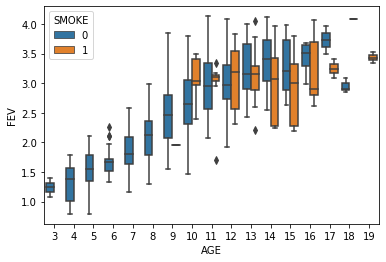

In [7]:
sns.boxplot(x='AGE', y='FEV',hue='SMOKE', data=new_df)

In [23]:
new_df['SEX*SMOKE']=new_df['SEX']*new_df['SMOKE']
new_df

,AGE,FEV,HEIGHT,SEX,SMOKE,SEX*SMOKE
0,9,1.708,57.0,0,0,0
1,8,1.724,67.5,0,0,0
2,7,1.720,54.5,0,0,0
3,9,1.558,53.0,1,0,0
4,9,1.895,57.0,1,0,0
...,...,...,...,...,...,...
645,15,2.278,60.0,0,1,0
650,15,3.727,68.0,1,1,1
651,18,2.853,60.0,0,0,0
652,16,2.795,63.0,0,1,0


In [29]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X = new_df[['SMOKE','AGE','SEX']]
y = new_df['FEV']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     262.5
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          2.96e-109
Time:                        20:13:00   Log-Likelihood:                -403.53
No. Observations:                 612   AIC:                             815.1
Df Residuals:                     608   BIC:                             832.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5314      0.076      7.032      0.0

In [31]:
new_df['AGE_SQ'] = new_df['AGE']*new_df['AGE']
new_df

,AGE,FEV,HEIGHT,SEX,SMOKE,SEX*SMOKE,AGE_SQ
0,9,1.708,57.0,0,0,0,81
1,8,1.724,67.5,0,0,0,64
2,7,1.720,54.5,0,0,0,49
3,9,1.558,53.0,1,0,0,81
4,9,1.895,57.0,1,0,0,81
...,...,...,...,...,...,...,...
645,15,2.278,60.0,0,1,0,225
650,15,3.727,68.0,1,1,1,225
651,18,2.853,60.0,0,0,0,324
652,16,2.795,63.0,0,1,0,256


In [33]:
X = new_df[['SMOKE','AGE', 'AGE_SQ','SEX']]
y = new_df['FEV']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          7.31e-118
Time:                        20:17:08   Log-Likelihood:                -380.60
No. Observations:                 612   AIC:                             771.2
Df Residuals:                     607   BIC:                             793.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5275      0.170     -3.095      0.0